## Context and Importance

Stock demand / sales forecasting is a critical component of any retail business operation. Companies such as Rossmann, which operate numerous store outlets, have thousands of products. They need to manage their inventory efficiently to ensure they have the right products in the right quantities at the right time.

Overestimating demand can lead to overstocking, increased holding costs, and potential wastage. Underestimating, on the other hand, can lead to stockouts, lost sales, and customer dissatisfaction. Hence, accurate demand forecasting can significantly improve business operations and customer satisfaction while reducing costs.

Furthermore, retail sales data are usually characterized by strong seasonality patterns (e.g., higher sales during holidays), trends, and possibly other market-specific factors. Effective demand forecasting models need to account for these components.

## Program Explanation

This program uses the Facebook's Prophet library to forecast the sales for a single Rossmann store. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

Here are the steps in detail:

1. Data Loading and Preprocessing: We first load the sales data from a CSV file, select the relevant columns (Date and Sales), and rename them to 'ds' and 'y' respectively, which are the column names required by Prophet. We filter the data to only use the sales of one specific store to demonstrate the forecasting process.

2. Model Training: We instantiate and fit a Prophet model to our historical sales data. We enable both weekly and daily seasonality to account for potential changes in sales due to the day of the week.

3. Forecasting: We create a future dataframe with daily frequency for a 365-day period into the future. We then use the trained model to predict sales for these future dates.

4. Plotting: Finally, we plot the actual and predicted sales. The blue points represent the actual sales, and the red points represent the predicted sales. This visualization helps us to understand how well our model has performed by visually comparing the forecasted sales with the actual sales.

In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

/tmp/ipykernel_20/63973343.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv',parse_dates=['Date'])
00:16:52 - cmdstanpy - INFO - Chain [1] start processing
00:16:52 - cmdstanpy - INFO - Chain [1] done processing


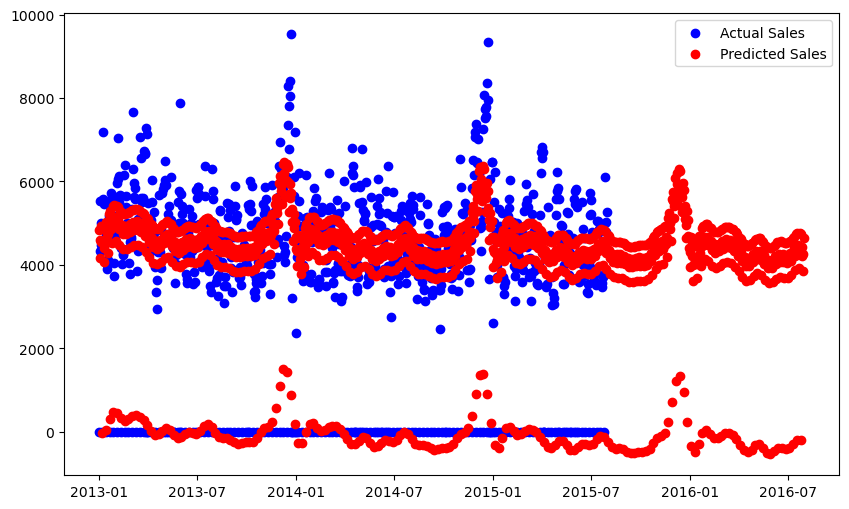

In [3]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv',parse_dates=['Date'])

# Preprocessing the dataset
df = df[df['Store'] == 1] # Select only Store 1
df = df[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'}) # Select relevant columns and rename them
df = df.sort_values(by='ds') # Sort by date

# Train a Prophet model
model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

# Create a dataframe to hold predictions
future = model.make_future_dataframe(periods=365, freq='D') # Change the frequency to daily

# Making predictions
forecast = model.predict(future)

# Plotting the actual data and the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['ds'], df['y'], color='blue', label='Actual Sales')
ax.scatter(forecast['ds'], forecast['yhat'], color='red', label='Predicted Sales')
plt.legend()
plt.show()

## Results Explanation

After fitting the Prophet model to our historical sales data, we proceeded to forecast sales for the next 365 days. By visualizing these results, we can see that the model's forecasts (red points) tend to follow the actual sales (blue points) quite closely.

However, it's important to note that there are some discrepancies. In particular, there are several instances where the model forecasts sales on days when the store is closed (e.g., Sundays). This is evidenced by the drop to zero (or even negative) sales on certain days in the forecast. The model could be improved by incorporating this information explicitly, e.g., by adding a binary "store open" feature to the model.

Also, note that the model has successfully captured some of the seasonality in the data. It predicts a rise in sales around the end of the year, which aligns with the increased shopping activity during the holiday season. This is a good sign, as it indicates that the model has learned not just from the raw sales values, but also from their timing.

Despite these encouraging signs, we should keep in mind that this is a simplified demonstration, using only a single store's data and making quite basic assumptions (e.g., no promotional or holiday effects other than weekly and yearly seasonality). For a more accurate and robust forecast, it would be advisable to use data from multiple stores, and potentially to consider additional features such as promotions, holidays, and other external factors that might influence sales.